<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/Example_Prediction_Noisy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# RNN example prediction of noisy data
#

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:


# create a dataset with noise and prepare input data into dataset a matrix

def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

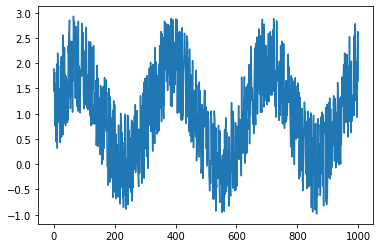

In [3]:
step = 8

N = 1000 # samples   
Tp = 800 # train dataset   

# create a dataset with noise and prepare input data and labels

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()


plt.plot(df)
plt.show()

In [4]:
# split data in train and test set
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [106]:
# preparation of the RNN model

model = Sequential()

# Model with hidden layer characteristics
model.add(SimpleRNN(units=4, input_shape=(1,step), activation="sigmoid"))

# fully connected flatten layer
model.add(Dense(3, activation="tanh"))

# output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# model.summary()
print("training in progress ...")
model.fit(trainX,trainY, epochs=16, batch_size=16, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict,testPredict),axis=0)

training in progress ...
7/7 [==============================] - 0s 2ms/step


In [107]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
testScore = model.evaluate(testX,testY,verbose=0)
print("Training Score = ", trainScore)
print("Test Score = ", testScore)

Training Score =  0.4282151162624359
Test Score =  0.4745219945907593


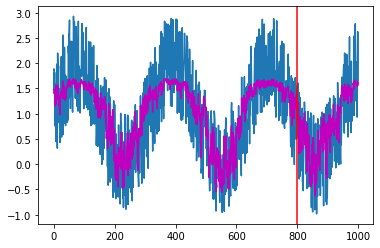

In [108]:

index = df.index.values
#plt.plot(index,df)
plt.plot(df)
plt.plot(index,predicted,c = "m")
plt.axvline(df.index[Tp], c = "r")
plt.show()

In [ ]:
# Try to modify your RNN  here to reach a better perfomance and prediction.